In [1]:
import numpy as np
import numpy.linalg as alg
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('snp452-data.csv')
n = np.size(df,0)
p = np.size(df,1)
df.head(5)

,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,...,D443,D444,D445,D446,D447,D448,D449,D450,D451,D452
0,126.75,30.51,40.05,21.75,25.60,7.01,3.24,42.04,31.59,19.14,...,25.65,13.50,11.35,8.16,22.03,80.23,17.60,25.12,40.30,40.64
1,126.27,30.69,40.44,21.34,26.30,6.94,3.45,42.33,31.60,19.05,...,25.59,13.40,11.54,8.28,22.94,80.70,18.10,24.55,40.40,40.27
2,127.19,31.97,40.70,22.11,27.51,7.16,3.45,42.75,32.00,19.96,...,26.48,13.29,12.25,8.44,24.24,82.97,18.94,24.99,40.66,41.39
3,127.07,31.78,38.87,22.07,28.51,7.17,3.37,42.18,31.73,19.78,...,26.05,13.31,11.80,8.31,25.45,82.51,19.15,25.15,40.26,41.59
4,125.70,31.17,39.85,22.40,27.13,6.69,3.35,42.23,31.80,18.82,...,26.11,13.02,12.60,8.27,24.71,81.47,18.75,25.27,40.00,42.03


## (a)  Logarithmic Prices

In [3]:
X = np.array(df).T
Y = np.log(X)

## (b) Log Price Jump

In [4]:
dY = np.diff(Y, axis = 1)
p,n = dY.shape

## (c) Realized Covariance Matrix

In [5]:
cov_Y = (dY @ dY.T)/n

## (d) Eigenvalues of cov_Y

In [7]:
eigen_values, eigen_vectors = alg.eig(cov_Y)
eigen_pairs = [(eigen_values[i], eigen_vectors[:, i]) for i in range(len(eigen_values))]
eigen_pairs.sort(key=lambda eigen_pairs: eigen_pairs[0], reverse=True)

## (e) Horn's Parallel Analysis

In [8]:
N = np.zeros(p)
R = 1000

for r in range(R):
    Sr = np.zeros(shape=(p, p))
    # Create a permutated Sr
    for i in range(p):
        permu = np.random.permutation(p)
        Sr[i, :] = cov_Y[i, permu]
    # Find the eigenvalues and eigenvectors of Sr
    Sr_eigen_values, Sr_eigen_vectors = alg.eig(Sr)
    Sr_eigen_pairs = [(Sr_eigen_values[j], Sr_eigen_vectors[:, j]) for j in range(len(Sr_eigen_values))]
    # Sort the eigen_pairs of Sr
    Sr_eigen_pairs.sort(key=lambda Sr_eigen_pairs: Sr_eigen_pairs[0],
                       reverse=True)
    # Update Nk over the new Sr_eigen_values
    for k in range(p):
        if eigen_values[k] < Sr_eigen_values[k]:
            N[k] += 1

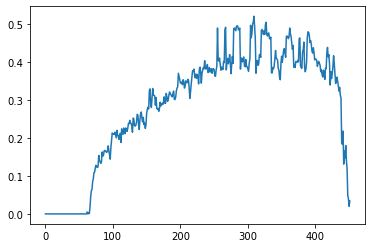

In [9]:
P_values = [(N[k]+1)/(R+1) for k in range(p)]
plt.plot(P_values)
plt.show()

In [10]:
for k in range(p):
    if N[k] > 0:
        print(k, N[k], P_values[k])
        break

62 5.0 0.005994005994005994


## Conclusion

The first competitive eigenvalue is the 62-nd one, whose p-value is 0.00599, thus considered to be signal, and PCA can be applied to this dataset.